In [22]:
!pip install scikit-learn matplotlib numpy tensorflow

In [23]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


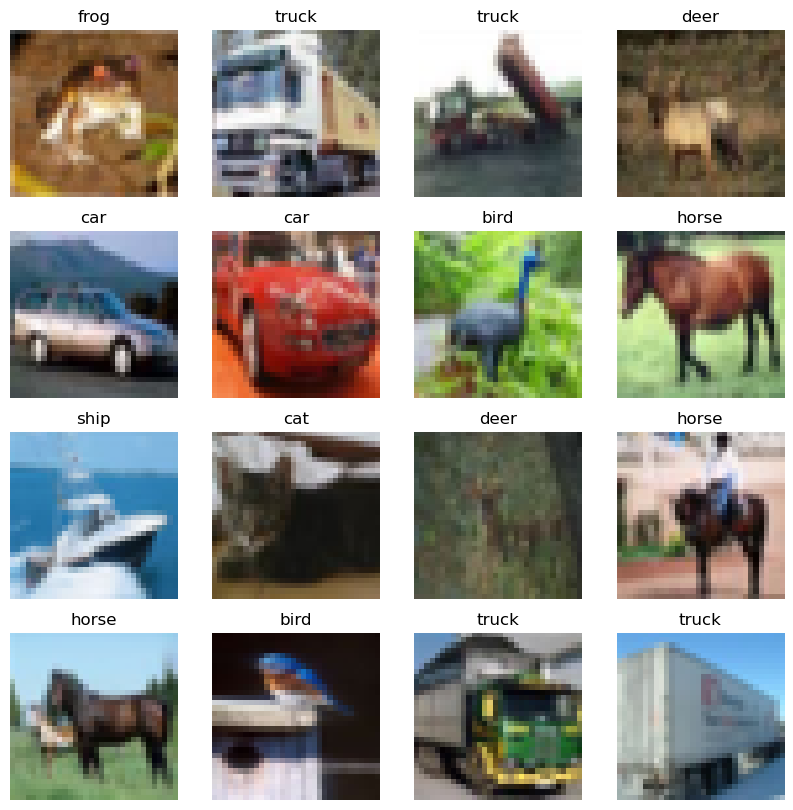

In [24]:
classes = ["airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_train[i])
    plt.title(classes[y_train[i][0]])
    plt.axis('off')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from skimage.color import rgb2gray


In [26]:
X_train_gray = np.array([rgb2gray(img) for img in X_train])
X_test_gray = np.array([rgb2gray(img) for img in X_test])

In [27]:
X_train_flat = X_train_gray.reshape(X_train_gray.shape[0], -1)
X_test_flat = X_test_gray.reshape(X_test_gray.shape[0], -1)


In [28]:
scaler = StandardScaler()
X_train_flat = scaler.fit_transform(X_train_flat)
X_test_flat = scaler.transform(X_test_flat)

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [30]:
svm_clf = SVC(kernel='linear', C=1.0, random_state=42)
svm_clf.fit(X_train_flat[:5000], y_train[:5000].ravel())

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred = svm_clf.predict(X_test_flat)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {classes[y_pred[i]]}\nTrue: {classes[y_test[i][0]]}")
    plt.axis('off')
plt.show()